In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import json
import requests
import seaborn as sns
import petpy as petpy
from datetime import datetime
import datetime
import pytz

In [2]:
api_key = "62lwxGGceqSEosxdTKBaXproKRrrBlV5RpcaYqvB7MWfdMj1Th"
client_secret= "6MTcqRKTyphCWDWhXCxkbjNraLXMkOQScoENAsm2"

pf= petpy.Petfinder(key=api_key, secret=client_secret)

dogs =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois')  # Adjust results_per_page to limit the number of results
dogs

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69339698,IL145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Dog,Young,Female,Large,Short,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69339698,dog,il145,NaN
1,69339658,IL145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Dog,Baby,Male,Medium,Short,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69339658,dog,il145,NaN
2,69339553,IL145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Dog,Young,Male,Small,Long,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69339553,dog,il145,NaN
3,69339397,IL145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Dog,Young,Female,Large,Short,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69339397,dog,il145,NaN
4,69339271,IL145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Dog,Young,Male,Large,Medium,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69339271,dog,il145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,60267962,IL979,https://www.petfinder.com/dog/charlotte-aka-ch...,Dog,Dog,Adult,Female,Medium,Short,"[Friendly, Playful, Affectionate, Curious, Smart]",...,12305 S. New Ave,None,Lemont,IL,60439,US,60267962,dog,il979,NaN
3996,60261648,IL267,https://www.petfinder.com/dog/grady-60261648/i...,Dog,Dog,Baby,Male,Medium,None,[],...,None,None,West Chicago,IL,60185,US,60261648,dog,il267,NaN
3997,60194278,IL513,https://www.petfinder.com/dog/becky-60194278/i...,Dog,Dog,Young,Female,Large,Short,[],...,P.O. Box 5122,None,Vernon Hills,IL,60061,US,60194278,dog,il513,NaN
3998,60193689,IL72,https://www.petfinder.com/dog/janis-60193689/i...,Dog,Dog,Young,Female,Medium,None,[],...,1997 N. Clybourn,None,Chicago,IL,60614,US,60193689,dog,il72,NaN


In [3]:
dogs.columns

dogs.tags.value_counts()

tags
[]                                                                                             2476
[Friendly, Affectionate]                                                                         60
[Friendly, Affectionate, Playful]                                                                31
[Friendly, Playful]                                                                              16
[Friendly, Affectionate, Playful, Funny, Loves Kisses]                                           15
                                                                                               ... 
[Friendly, Affectionate, Playful, Smart, Curious]                                                 1
[Friendly, Gentle, Playful, Quiet, Couch potato, Loves Kisses]                                    1
[Gentle, Affectionate, Playful, Smart, Loyal, Protective, Funny, Loves kisses, Independent]       1
[Friendly, Affectionate, Playful, Smart, Curious, Loves kisses, Athletic, Funny]               

In [5]:
df = dogs[['id', 'organization_id', 'url', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary','attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id']]



In [6]:
df.to_csv("Datasets/petfinder_dog_data.csv")

In [7]:
pf= petpy.Petfinder(key=api_key, secret=client_secret)

adopted_dogs =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois', status='adopted')  # Adjust results_per_page to limit the number of results
adopted_dogs

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69340177,IL145,https://www.petfinder.com/dog/splatter-6934017...,Dog,Dog,Baby,Male,Medium,Short,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69340177,dog,il145,NaN
1,69340121,IL145,https://www.petfinder.com/dog/cruze-69340121/i...,Dog,Dog,Baby,Male,Medium,Short,[],...,8301 West 191st Street,None,Tinley Park,IL,60477,US,69340121,dog,il145,NaN
2,69338995,IL976,https://www.petfinder.com/dog/y10f-parcheesi-6...,Dog,Dog,Baby,Female,Medium,None,[],...,None,None,GILBERTS,IL,60136,US,69338995,dog,il976,NaN
3,69337958,WI542,https://www.petfinder.com/dog/andie-69337958/w...,Dog,Dog,Baby,Female,Small,None,[],...,None,None,Salem,WI,53168,US,69337958,dog,wi542,NaN
4,69337131,IL81,https://www.petfinder.com/dog/benji-69337131/i...,Dog,Dog,Baby,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,69337131,dog,il81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,66447254,IL81,https://www.petfinder.com/dog/fergie-66447254/...,Dog,Dog,Adult,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66447254,dog,il81,NaN
3996,66447260,IL81,https://www.petfinder.com/dog/06-0617-66447260...,Dog,Dog,Adult,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66447260,dog,il81,NaN
3997,66447266,IL81,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,Dog,Senior,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66447266,dog,il81,NaN
3998,66447273,IL81,https://www.petfinder.com/dog/bella-66447273/i...,Dog,Dog,Adult,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66447273,dog,il81,NaN


In [10]:
adopted_dogs_df = adopted_dogs[['id', 'organization_id', 'url', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary','attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id']]



adopted_dogs_df.to_csv("Datasets/petfinder_adopted_dogs_data.csv")

In [14]:
# merged_df = pd.merge(df, adopted_dogs_df, on='id', how='outer')

merged_df = pd.concat([df, adopted_dogs_df], ignore_index=True)




In [ ]:
merged_df.columns

In [17]:



merged_df['published_at'] = pd.to_datetime(merged_df['published_at'])
merged_df['status_changed_at'] = pd.to_datetime(merged_df['status_changed_at'])



merged_df['days_on_petfinder'] = merged_df['status_changed_at'] -merged_df['published_at']
merged_df['days_on_petfinder'] = merged_df['days_on_petfinder']/np.timedelta64(1,'D')
merged_df['days_on_petfinder'] = merged_df['days_on_petfinder'].round()



In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        8000 non-null   int64              
 1   organization_id           8000 non-null   object             
 2   organization_id           8000 non-null   object             
 3   url                       8000 non-null   object             
 4   species                   8000 non-null   object             
 5   age                       8000 non-null   object             
 6   gender                    8000 non-null   object             
 7   size                      8000 non-null   object             
 8   coat                      2836 non-null   object             
 9   tags                      8000 non-null   object             
 10  name                      8000 non-null   object             
 11  description      

In [58]:
today = datetime.now()

merged_df['today']= datetime.now()


In [63]:
central_timezone = pytz.timezone('US/Central')
aware_datetime = today.astimezone(central_timezone)
aware_datetime

datetime.datetime(2023, 10, 17, 21, 42, 51, 576571, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

In [65]:
merged_df['today'] = aware_datetime

In [69]:

# today = np.datetime64(today) # convert to numpy datetime
merged_df['adoptable_days_online'] =(merged_df['today'] - merged_df['published_at']).dt.days

In [ ]:

# today = today.strftime('%Y-%m-%d %H:%M:%S%z')

# merged_df['adoptable_days_online']= today-merged_df['published_at']

# merged_df['adoptable_days_online'] = merged_df['adoptable_days_online']/np.timedelta64(1,'D')
# merged_df['adoptable_days_online'] = merged_df['adoptable_days_online'].round()




In [70]:
merged_df['adoptable_days_online'].describe()

count    8000.000000
mean       47.188875
std        40.170209
min         0.000000
25%        20.000000
50%        47.000000
75%        56.000000
max       232.000000
Name: adoptable_days_online, dtype: float64

<Axes: ylabel='Frequency'>

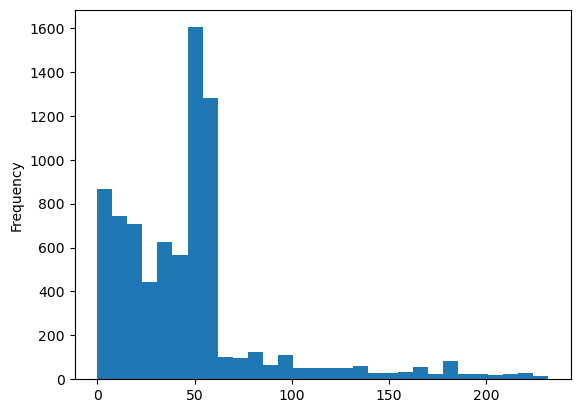

In [72]:
merged_df['adoptable_days_online'].plot.hist(bins=30)

In [74]:
merged_df.to_csv("Datasets/merged_dog_data.csv")